Mutual information score feature selection

In [54]:
from warnings import filterwarnings
filterwarnings("ignore")

Reading dataset

In [55]:
import pandas as pd
import numpy as np

In [56]:
df=pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [59]:
# checking missing data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
# check duplicates values
df.duplicated().sum()

0

seperate x and y 

In [61]:
x=df.drop(columns=["PassengerId","Name","Ticket","Cabin","Survived"])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [62]:
y=df[["Survived"]]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


seperate cat and con in x

In [63]:
cat=list(x.columns[x.dtypes=="O"])
cat

['Sex', 'Embarked']

In [64]:
con=list(x.columns[x.dtypes!="O"])
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

create a preprocessing pipeline

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline

In [66]:
num_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy="median")),
                   ('scaler',StandardScaler())])

In [67]:
cat_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy="most_frequent")),
                   ('ordinale',OrdinalEncoder())])

In [68]:
pre1=ColumnTransformer([('num',num_pipe1,con),
                        ('cat',cat_pipe1,cat)]).set_output(transform="pandas")

In [69]:
x_pre1=pre1.fit_transform(x)

In [70]:
x_pre1.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,2.0


perform feature selection with mutual information scores

In [71]:
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x_pre1,y)
mi

array([0.0323431 , 0.0240701 , 0.01444391, 0.00701436, 0.12883122,
       0.17766508, 0.00787086])

In [72]:
mi=pd.Series(mi)
mi.index=x_pre1.columns
mi=mi.sort_values(ascending=False)
mi

cat__Sex         0.177665
num__Fare        0.128831
num__Pclass      0.032343
num__Age         0.024070
num__SibSp       0.014444
cat__Embarked    0.007871
num__Parch       0.007014
dtype: float64

<Axes: title={'center': 'mutual info score'}>

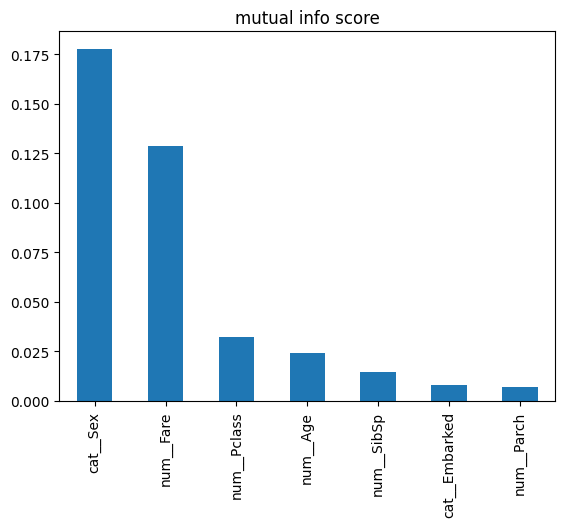

In [73]:
mi.plot(kind="bar",title="mutual info score")

select 5 best feature

In [100]:
from sklearn.feature_selection import SelectKBest
sel=SelectKBest(mutual_info_classif,k=5)
sel.fit(x_pre1,y)
sel_cols=sel.get_feature_names_out()
sel_cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Fare', 'cat__Sex'],
      dtype=object)

In [101]:
imp_cols=[]
for i in sel_cols:
    s=i.split('__')[1]
    imp_cols.append(s)
    

In [102]:
imp_cols

['Pclass', 'Age', 'SibSp', 'Fare', 'Sex']

In [103]:
x_imp=x[imp_cols]
x_imp

,Pclass,Age,SibSp,Fare,Sex
0,3,22.0,1,7.2500,male
1,1,38.0,1,71.2833,female
2,3,26.0,0,7.9250,female
3,1,35.0,1,53.1000,female
4,3,35.0,0,8.0500,male
...,...,...,...,...,...
886,2,27.0,0,13.0000,male
887,1,19.0,0,30.0000,female
888,3,NaN,1,23.4500,female
889,1,26.0,0,30.0000,male


seperate cat con in selected feature

In [104]:
cat_sel= list(x_imp.columns[x_imp.dtypes=='object'])
con_sel= list(x_imp.columns[x_imp.dtypes!='object'])

Create final preprocessing pipeline

In [105]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy="median")),
                    ('scaler',StandardScaler())])

In [106]:
from sklearn.preprocessing import OneHotEncoder
cat_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy="most_frequent")),
                    ('ohe',OneHotEncoder(handle_unknown="ignore",sparse_output=False))])

In [107]:
pre2=ColumnTransformer([('num',num_pipe2,con_sel),
                        ('cat',cat_pipe2,cat_sel)]).set_output(transform="pandas")

In [108]:
x_sel_pre=pre2.fit_transform(x_imp)
x_sel_pre

,num__Pclass,num__Age,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male
0,0.827377,-0.565736,0.432793,-0.502445,0.0,1.0
1,-1.566107,0.663861,0.432793,0.786845,1.0,0.0
2,0.827377,-0.258337,-0.474545,-0.488854,1.0,0.0
3,-1.566107,0.433312,0.432793,0.420730,1.0,0.0
4,0.827377,0.433312,-0.474545,-0.486337,0.0,1.0
...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.386671,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.044381,1.0,0.0
888,0.827377,-0.104637,0.432793,-0.176263,1.0,0.0
889,-1.566107,-0.258337,-0.474545,-0.044381,0.0,1.0


splitting the dataset


In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sel_pre,y,test_size=0.2,random_state=21)

In [110]:
x_train.shape

(712, 6)

In [111]:
x_test.shape

(179, 6)

Model Building

In [112]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [113]:
model.score(x_train,y_train)

0.7879213483146067

In [114]:
model.score(x_test,y_test)

0.8100558659217877

Evaluate model

In [115]:
y_pred_tr=model.predict(x_train)
y_pred_ts=model.predict(x_test)

In [116]:
y_pred_tr[:5]

array([1, 1, 1, 1, 0], dtype=int64)

Display confusion matrix

In [117]:
from sklearn.metrics import *

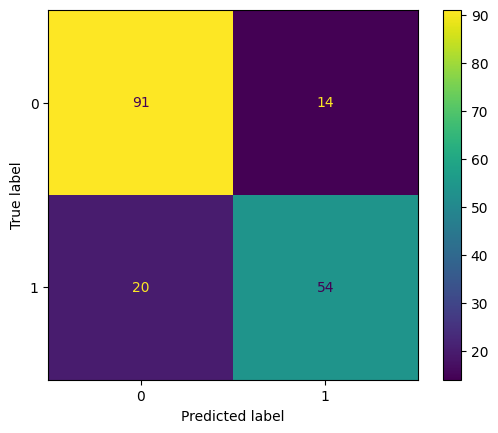

In [118]:
cm=confusion_matrix(y_test,y_pred_ts)
cmd=ConfusionMatrixDisplay(cm,display_labels=model.classes_)
cmd.plot()

Display classification report

In [119]:
print(classification_report(y_test,y_pred_ts))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Predict out of sample dat

In [120]:
x_new=pd.read_csv("test_titanic.csv")
x_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [122]:
x_new.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [123]:
x_new_pre=pre2.transform(x_new)

In [125]:
x_new_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Fare,cat__Sex_female,cat__Sex_male
0,0.827377,0.394887,-0.474545,-0.490783,0.0,1.0
1,0.827377,1.355510,0.432793,-0.507479,1.0,0.0
2,-0.369365,2.508257,-0.474545,-0.453367,0.0,1.0
3,0.827377,-0.181487,-0.474545,-0.474005,0.0,1.0
4,0.827377,-0.565736,0.432793,-0.401017,1.0,0.0


In [127]:
y_pred=model.predict(x_new_pre)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [128]:
x_new["prediction"]=y_pred

In [129]:
x_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [131]:
prob=model.predict_proba(x_new_pre)
prob[:5]

array([[0.91722542, 0.08277458],
       [0.62823359, 0.37176641],
       [0.90959019, 0.09040981],
       [0.8943018 , 0.1056982 ],
       [0.40676392, 0.59323608]])

In [133]:
max_prob=np.max(prob,axis=1)
max_prob[:5]

array([0.91722542, 0.62823359, 0.90959019, 0.8943018 , 0.59323608])

In [134]:
x_new["probability"]=max_prob

In [135]:
x_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction,probability
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.917225
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.628234
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.909590
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.894302
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.593236


In [136]:
x_new.to_csv("result.csv",index=False)

Plot result

<Axes: xlabel='prediction'>

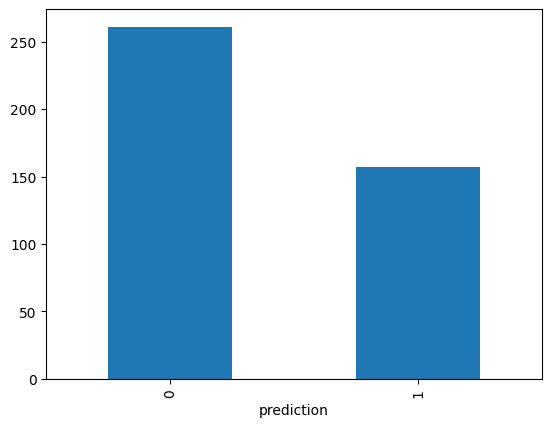

In [137]:
x_new["prediction"].value_counts().plot(kind="bar")